# A deep neural network for image classification (cat vs no-cat)

In [1]:
# Import packages and files
import numpy as np
import h5py
import matplotlib.pyplot as plt
from dnn_utils_functions import *

In [2]:
# Other settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# np.random.seed(1) # only used for debugging

In [3]:
# Add the file names
train_file = 'train_data.h5'
test_file = 'test_data.h5'

In [4]:
# Read in data
train_dataset = h5py.File('data/' + train_file, "r")
train_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('data/' + test_file, "r")
test_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
train_y_orig = train_y_orig.reshape((1, train_y_orig.shape[0]))
test_y_orig = test_y_orig.reshape((1, test_y_orig.shape[0]))

y = 1. It's a cat.


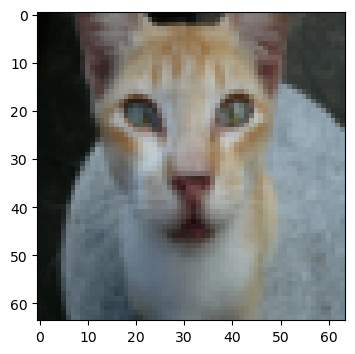

In [5]:
# Get an idea of the data your are handling
index = 11
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y_orig[0,index]) + ". It's a " + classes[train_y_orig[0,index]].decode("utf-8") +  ".")

In [6]:
# Explore train and test set and get the number of pixels (we assume we are dealing with squared images (e.g. 64 x 64 pixel images))
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

In [7]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

In [8]:
# Standardize your data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [9]:
# Constants for your model
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [10]:
# Train the model (training rate is set to default 0.0075))
parameters, costs = L_layer_model(train_x, train_y_orig, layers_dims, num_iterations = 2500, print_cost = True)

# print("Cost after first iteration: " + str(costs[0]))

Cost after iteration 0: 0.6931477726958
Cost after iteration 100: 0.6780107728090446
Cost after iteration 200: 0.6675997530076283
Cost after iteration 300: 0.6604218729413204
Cost after iteration 400: 0.6554578158288099
Cost after iteration 500: 0.6520134603618388
Cost after iteration 600: 0.649615817609133
Cost after iteration 700: 0.6479417374612982
Cost after iteration 800: 0.6467696408278701
Cost after iteration 900: 0.6459469904244376
Cost after iteration 1000: 0.6453683565180596
Cost after iteration 1100: 0.6449605941011141
Cost after iteration 1200: 0.6446727774747648
Cost after iteration 1300: 0.6444693397903307
Cost after iteration 1400: 0.6443253714906714
Cost after iteration 1500: 0.6442233840298892
Cost after iteration 1600: 0.6441510728582549
Cost after iteration 1700: 0.6440997647032185
Cost after iteration 1800: 0.6440633362006798
Cost after iteration 1900: 0.6440374583192076
Cost after iteration 2000: 0.6440190669815907
Cost after iteration 2100: 0.6440059911782885
Cost

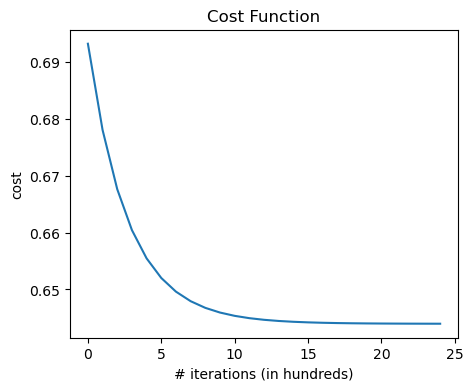

In [11]:
# Plot cost function
plt.plot(np.arange(len(costs)), costs)
plt.title("Cost Function")
plt.xlabel("# iterations (in hundreds)")
plt.ylabel("cost")
plt.show()

In [12]:
# Calculate the prediction accuracy in your training set
pred_train = predict(train_x, train_y_orig, parameters)

Accuracy: 0.6555023923444976


In [13]:
# Calculate the prediction accuray in your test set using your trained model
pred_test = predict(test_x, test_y_orig, parameters)

Accuracy: 0.3400000000000001


Obviously not the best performing neural network. We probably could achieve higher accuracy by tuning the hyperparameters such as learning rate, layer dimensions and the number of iterations.